In [ ]:
from google.colab import files

# Upload video file (e.g. video.mp4)
uploaded = files.upload()


Saving Stop.MOV to Stop.MOV
Saving Stop1.MOV to Stop1.MOV
Saving Right1.MOV to Right1.MOV
Saving Left1.MOV to Left1.MOV
Saving Go1.MOV to Go1.MOV
Saving Go.MOV to Go.MOV
Saving Left.MOV to Left.MOV
Saving Right.MOV to Right.MOV


In [ ]:
import cv2
import os

# === Step 1: Enter your multiple videos per class ===
videos = {
    "Go3": ["Go.MOV", "Go1.MOV"],
    "Stop3": ["Stop.MOV", "Stop1.MOV"],
    "Left3": ["Left.MOV", "Left1.MOV"],
    "Right3": ["Right.MOV", "Right1.MOV"]
}

# === Step 2: Extract frames from each video ===
for folder_name, video_list in videos.items():

    # Create output folder
    os.makedirs(folder_name, exist_ok=True)

    frame_idx = 0  # shared counter across videos

    print(f"\n📁 Processing folder: {folder_name}")

    # Loop through each video file in the list
    for video_file in video_list:
        if not isinstance(video_file, str):
            print(f"❌ ERROR: video_file is not a string → {video_file}")
            continue

        print(f"   🎬 Opening video: {video_file}")

        cap = cv2.VideoCapture(video_file)

        # Check if video is opened
        if not cap.isOpened():
            print(f"   ❌ Cannot open video: {video_file}")
            continue

        # Frame extraction loop
        while True:
            ok, frame = cap.read()
            if not ok:
                break

            out_path = os.path.join(folder_name, f"frame_{frame_idx:06d}.jpg")
            cv2.imwrite(out_path, frame)
            frame_idx += 1

        cap.release()
        print(f"   ✓ Finished extracting: {video_file}")

    print(f"✅ Total frames saved in '{folder_name}': {frame_idx}")

print("\n🎉 All videos processed successfully!")



📁 Processing folder: Go3
   🎬 Opening video: Go.MOV
   ✓ Finished extracting: Go.MOV
   🎬 Opening video: Go1.MOV
   ✓ Finished extracting: Go1.MOV
✅ Total frames saved in 'Go3': 1518

📁 Processing folder: Stop3
   🎬 Opening video: Stop.MOV
   ✓ Finished extracting: Stop.MOV
   🎬 Opening video: Stop1.MOV
   ✓ Finished extracting: Stop1.MOV
✅ Total frames saved in 'Stop3': 1335

📁 Processing folder: Left3
   🎬 Opening video: Left.MOV
   ✓ Finished extracting: Left.MOV
   🎬 Opening video: Left1.MOV
   ✓ Finished extracting: Left1.MOV
✅ Total frames saved in 'Left3': 1956

📁 Processing folder: Right3
   🎬 Opening video: Right.MOV
   ✓ Finished extracting: Right.MOV
   🎬 Opening video: Right1.MOV
   ✓ Finished extracting: Right1.MOV
✅ Total frames saved in 'Right3': 1393

🎉 All videos processed successfully!


In [ ]:
# === Cell A ===
# Mount Drive and check dataset
from google.colab import drive
drive.mount('/content/drive')

# Set path to your dataset folder in Drive:
# Suppose in Drive you placed a folder 'robot_dataset' that contains the four class folders
DATASET_ROOT = "/content/drive/MyDrive/robot_dataset3"   # <-- update this path
!ls -la "$DATASET_ROOT"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 16
drwx------ 2 root root 4096 Dec  2 13:20 Go3
drwx------ 2 root root 4096 Dec  2 13:20 Left3
drwx------ 2 root root 4096 Dec  2 13:21 Right3
drwx------ 2 root root 4096 Dec  2 13:19 Stop3


In [ ]:
# === Cell B ===
import os
classes = sorted([d for d in os.listdir(DATASET_ROOT) if os.path.isdir(os.path.join(DATASET_ROOT,d))])
print("Found classes:", classes)
for c in classes:
    print(c, len(os.listdir(os.path.join(DATASET_ROOT, c))))


Found classes: ['Go3', 'Left3', 'Right3', 'Stop3']
Go3 1518
Left3 1956
Right3 1393
Stop3 1335


In [ ]:
# === Cell C ===
!pip install -q mediapipe opencv-python-headless scikit-learn matplotlib tqdm


In [ ]:
import os
import random
import shutil
from pathlib import Path

# === SET YOUR INPUT & OUTPUT FOLDERS ===
SRC = "/content/drive/MyDrive/robot_dataset3"          # your raw dataset folder
DST = "/content/robot_dataset_split3"        # output split folder

# Create destination folder
Path(DST).mkdir(parents=True, exist_ok=True)

# Create subfolders
for split in ["train", "val", "test"]:
    Path(os.path.join(DST, split)).mkdir(parents=True, exist_ok=True)

# Fix randomness
random.seed(42)

# Get gesture class folders
classes = sorted([d for d in os.listdir(SRC) if os.path.isdir(os.path.join(SRC, d))])
print("Found classes:", classes)

# === MAIN LOOP: SPLIT EACH CLASS ===
for cls in classes:
    class_src = os.path.join(SRC, cls)

    # List all images
    files = [f for f in os.listdir(class_src)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    random.shuffle(files)
    n = len(files)

    # Compute split sizes
    n_train = int(0.70 * n)
    n_val = int(0.15 * n)
    n_test = n - n_train - n_val

    train_files = files[:n_train]
    val_files = files[n_train:n_train+n_val]
    test_files = files[n_train+n_val:]

    # Helper to copy files
    def copy_files(file_list, split_name):
        dst_folder = os.path.join(DST, split_name, cls)
        Path(dst_folder).mkdir(parents=True, exist_ok=True)

        for fname in file_list:
            shutil.copy(os.path.join(class_src, fname), dst_folder)

    # Copy into their corresponding folders
    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(f"Class '{cls}': train={len(train_files)}, val={len(val_files)}, test={len(test_files)}")

print("\n🎉 Dataset successfully split into train/val/test!")
print("Saved to:", DST)


Found classes: ['Go3', 'Left3', 'Right3', 'Stop3']
Class 'Go3': train=1062, val=227, test=229
Class 'Left3': train=1369, val=293, test=294
Class 'Right3': train=975, val=208, test=210
Class 'Stop3': train=934, val=200, test=201

🎉 Dataset successfully split into train/val/test!
Saved to: /content/robot_dataset_split3


In [ ]:
# === Cell C: Extract MediaPipe landmarks and save .npz files ===
import os, cv2, numpy as np
from pathlib import Path
import mediapipe as mp

mp_hands = mp.solutions.hands

SRC_SPLIT = "/content/robot_dataset_split3"
OUT_DIR = "/content/mediapipe_landmarks"
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

USE_Z = False  # 42D = (x,y) only

def wrist_center_scale(arr):
    wrist = arr[0,:2]
    m9 = arr[9,:2]
    p17 = arr[17,:2]
    scale = max(np.linalg.norm(wrist-m9), np.linalg.norm(wrist-p17))
    if scale < 1e-6: scale = 1.0
    return wrist, scale

def normalize(arr, use_z=False):
    wrist, scale = wrist_center_scale(arr)
    if not use_z:
        coords = arr[:,:2].copy()
        coords[:,0] = (coords[:,0]-wrist[0])/scale
        coords[:,1] = (coords[:,1]-wrist[1])/scale
        return coords.flatten()
    else:
        coords = arr.copy()
        coords[:,0] = (coords[:,0]-wrist[0])/scale
        coords[:,1] = (coords[:,1]-wrist[1])/scale
        coords[:,2] = coords[:,2]/scale
        return coords.flatten()

with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
    classes = sorted(os.listdir(os.path.join(SRC_SPLIT,"train")))
    print("Classes:", classes)

    for split in ["train","val","test"]:
        X = []
        y = []
        for cls_idx, cls in enumerate(classes):
            folder = os.path.join(SRC_SPLIT, split, cls)
            for img_name in os.listdir(folder):
                if not img_name.lower().endswith(('.jpg','.png','.jpeg')):
                    continue
                img = cv2.imread(os.path.join(folder,img_name))
                if img is None:
                    continue

                rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                res = hands.process(rgb)

                if not res.multi_hand_landmarks:
                    continue

                lm = res.multi_hand_landmarks[0]
                arr = np.array([[p.x, p.y, p.z] for p in lm.landmark], dtype=np.float32)
                v = normalize(arr, use_z=USE_Z)
                X.append(v)
                y.append(cls_idx)

        X = np.array(X, np.float32)
        y = np.array(y, np.int32)

        np.savez_compressed(os.path.join(OUT_DIR, f"{split}_42d.npz"), X=X, y=y, classes=classes)
        print(f"{split} saved:", X.shape)


Classes: ['Go3', 'Left3', 'Right3', 'Stop3']
train saved: (3944, 42)
val saved: (829, 42)
test saved: (860, 42)


In [ ]:
# === Cell D: Load & standardize dataset ===
import numpy as np, os
from sklearn.utils.class_weight import compute_class_weight

OUT = "/content/mediapipe_landmarks"

train = np.load(os.path.join(OUT,"train_42d.npz"))
val   = np.load(os.path.join(OUT,"val_42d.npz"))
test  = np.load(os.path.join(OUT,"test_42d.npz"))

X_train = train["X"]
X_val   = val["X"]
X_test  = test["X"]

y_train = train["y"]
y_val   = val["y"]
y_test  = test["y"]

classes = train["classes"].tolist()
print("Classes:", classes)

mean = X_train.mean(0, keepdims=True)
std  = X_train.std(0, keepdims=True) + 1e-9

X_train_n = (X_train - mean)/std
X_val_n   = (X_val - mean)/std
X_test_n  = (X_test - mean)/std

np.savez(os.path.join(OUT,"meanstd.npz"), mean=mean, std=std)

cw = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = {i: float(cw[i]) for i in range(len(cw))}
class_weights


Classes: ['Go3', 'Left3', 'Right3', 'Stop3']


{0: 0.928436911487759, 1: 0.985014985014985, 2: 1.0346274921301155, 3: 1.0625}

In [ ]:
# === Cell D ===
import os, numpy as np
from pathlib import Path
from tqdm import tqdm
import cv2
import mediapipe as mp
mp_hands = mp.solutions.hands

# Parameters
SPLIT_ROOT = "/content/robot_dataset_split3"  # from Cell A
OUT_DIR = os.path.join(os.path.dirname(SPLIT_ROOT), "mediapipe_landmarks")
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
USE_Z = False  # set True -> 63D (x,y,z); False -> 42D (x,y)
N_LANDMARKS = 21

# helper functions
def wrist_center_scale(landmarks):
    # landmarks: Nx3 (x,y,z) normalized [0,1] by MediaPipe image dims
    # wrist index 0, middle_mcp 9, pinky_mcp 17
    wrist = landmarks[0,:2]  # x,y
    m9 = landmarks[9,:2]
    p17 = landmarks[17,:2]
    # scale = max(distance wrist->middle_mcp, wrist->pinky_mcp)
    s = max(np.linalg.norm(wrist - m9), np.linalg.norm(wrist - p17))
    if s < 1e-6:
        s = 1.0
    return wrist, s

def normalize_landmarks(lm_array, use_z=False):
    # lm_array shape (21, 3) from mediapipe.landmark: x,y,z normalized (x,y in [0,1])
    wrist, scale = wrist_center_scale(lm_array)
    coords = lm_array[:, :3] if use_z else lm_array[:, :2]
    # subtract wrist (center)
    coords_centered = coords.copy()
    coords_centered[...,0] = coords[...,0] - wrist[0]
    coords_centered[...,1] = coords[...,1] - wrist[1]
    # divide by scale
    coords_centered[...,0] = coords_centered[...,0] / scale
    coords_centered[...,1] = coords_centered[...,1] / scale
    if not use_z:
        return coords_centered.flatten()  # 42D
    else:
        coords_centered[...,2] = coords[...,2] / scale  # normalize z by same scale
        return coords_centered.flatten()  # 63D

def extract_from_image(path, hands, use_z=False):
    img = cv2.imread(path)
    if img is None:
        return None
    h, w = img.shape[:2]
    # MediaPipe expects RGB
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb)
    if not results.multi_hand_landmarks:
        return None
    # choose first detected hand (if multiple). You can later handle multiple hands if needed.
    lm = results.multi_hand_landmarks[0]
    arr = np.array([[p.x, p.y, p.z] for p in lm.landmark], dtype=np.float32)
    return normalize_landmarks(arr, use_z=use_z)

# Run extraction for each split
with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.4) as hands:
    classes = sorted([d for d in os.listdir(os.path.join(SPLIT_ROOT, "train")) if os.path.isdir(os.path.join(SPLIT_ROOT,"train",d))])
    class_to_idx = {c:i for i,c in enumerate(classes)}
    for split in ("train","val","test"):
        X = []
        y = []
        split_dir = os.path.join(SPLIT_ROOT, split)
        print("Processing split:", split)
        for cls in tqdm(classes):
            cls_dir = os.path.join(split_dir, cls)
            if not os.path.isdir(cls_dir): continue
            for fname in os.listdir(cls_dir):
                if not fname.lower().endswith(('.jpg','.jpeg','.png')): continue
                path = os.path.join(cls_dir, fname)
                v = extract_from_image(path, hands, use_z=USE_Z)
                if v is not None:
                    X.append(v)
                    y.append(class_to_idx[cls])
        X = np.stack(X) if len(X)>0 else np.zeros((0, (3 if USE_Z else 2)*N_LANDMARKS), dtype=np.float32)
        y = np.array(y, dtype=np.int32)
        out_path = os.path.join(OUT_DIR, f"{split}_mp_hands_{'63d' if USE_Z else '42d'}.npz")
        np.savez_compressed(out_path, X=X, y=y, classes=classes)
        print("Saved", out_path, "shape X:", X.shape, "y:", y.shape)
print("Extraction complete. Files in:", OUT_DIR)


Processing split: train


100%|██████████| 4/4 [03:32<00:00, 53.07s/it]


Saved /content/mediapipe_landmarks/train_mp_hands_42d.npz shape X: (4001, 42) y: (4001,)
Processing split: val


100%|██████████| 4/4 [00:42<00:00, 10.59s/it]


Saved /content/mediapipe_landmarks/val_mp_hands_42d.npz shape X: (843, 42) y: (843,)
Processing split: test


100%|██████████| 4/4 [00:42<00:00, 10.59s/it]

Saved /content/mediapipe_landmarks/test_mp_hands_42d.npz shape X: (866, 42) y: (866,)
Extraction complete. Files in: /content/mediapipe_landmarks


In [ ]:
# === Cell E ===
import numpy as np

def mirror_landmarks(vec, use_z=False):
    # vec flattened -> reshape to (N,2) or (N,3)
    dim = 3 if use_z else 2
    arr = vec.reshape((N_LANDMARKS, dim)).copy()
    # Mirror horizontally: x -> -x (because data is wrist-centered)
    arr[:,0] = -arr[:,0]
    return arr.flatten()

def add_gaussian_noise(vec, sigma=0.01):
    noise = np.random.normal(0, sigma, size=vec.shape).astype(np.float32)
    return vec + noise

def rotate_landmarks(vec, max_deg=10, use_z=False):
    # rotate around origin (wrist-centered) in xy plane by random angle in [-max_deg, max_deg]
    angle = np.deg2rad(np.random.uniform(-max_deg, max_deg))
    c, s = np.cos(angle), np.sin(angle)
    dim = 3 if use_z else 2
    arr = vec.reshape((N_LANDMARKS, dim)).copy()
    x = arr[:,0]; y = arr[:,1]
    xr = c*x - s*y
    yr = s*x + c*y
    arr[:,0] = xr; arr[:,1] = yr
    return arr.flatten()

def scale_jitter(vec, min_scale=0.9, max_scale=1.1):
    factor = np.random.uniform(min_scale, max_scale)
    return vec * factor

def augment_vector(vec, use_z=False, p_mirror=0.5, noise_sigma=0.01, p_rotate=0.5, p_scale=0.5):
    v = vec.copy()
    if np.random.rand() < p_mirror:
        v = mirror_landmarks(v, use_z=use_z)
    if np.random.rand() < p_rotate:
        v = rotate_landmarks(v, use_z=use_z)
    if np.random.rand() < p_scale:
        v = scale_jitter(v)
    v = add_gaussian_noise(v, sigma=noise_sigma)
    return v


In [ ]:
# === Cell F (FINAL FIXED VERSION) ===
import numpy as np
import tensorflow as tf

USE_Z = False
dim = 3 if USE_Z else 2
input_dim = X_train_n.shape[1]

# ---------- FIXED: pure NumPy augmentation ----------
def numpy_augment(x_np):
    x_np = np.array(x_np, dtype=np.float32)  # ensure numpy array

    # mirror
    if np.random.rand() < 0.5:
        x_np = mirror_landmarks(x_np, use_z=USE_Z)

    # rotation
    if np.random.rand() < 0.5:
        x_np = rotate_landmarks(x_np, use_z=USE_Z)

    # scale jitter
    if np.random.rand() < 0.5:
        x_np = scale_jitter(x_np)

    # Gaussian noise
    x_np = add_gaussian_noise(x_np, sigma=0.01)

    return x_np.astype(np.float32)


# ---------- FIXED: tf.py_function wrapper ----------
def aug_map(x, y):
    x_aug = tf.py_function(
        func=numpy_augment,
        inp=[x],
        Tout=tf.float32
    )
    # set shape
    x_aug.set_shape((input_dim,))
    return x_aug, y


# ---------- FIXED: dataset creators ----------
def make_dataset(X, y, training=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if training:
        ds = ds.shuffle(1000)
        ds = ds.map(aug_map, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(32).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_dataset(X_train_n, y_train, training=True)
val_ds   = make_dataset(X_val_n, y_val, training=False)
test_ds  = make_dataset(X_test_n, y_test, training=False)


In [ ]:
# === Cell G ===
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train_n.shape[1]  # 42 or 63
num_classes = len(classes)

# ---- MLP model ----
def build_mlp(input_dim, num_classes, dropout=0.3):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inp)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inp, out, name='mlp_landmarks')
    return model

# ---- 1D-CNN model ----
def build_1d_cnn(input_dim, num_classes, use_z=False):
    # reshape vector to (N_landmarks, features_per_landmark)
    features = 3 if use_z else 2
    seq_len = N_LANDMARKS
    inp = layers.Input(shape=(input_dim,))
    x = layers.Reshape((seq_len, features))(inp)          # (21,2) or (21,3)
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inp, out, name='1d_cnn_landmarks')
    return model

mlp = build_mlp(input_dim, num_classes)
cnn1d = build_1d_cnn(input_dim, num_classes, use_z=USE_Z)

print("MLP Summary")
mlp.summary()
print("1D-CNN Summary")
cnn1d.summary()


MLP Summary


Model: "mlp_landmarks"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,020 (54.77 KB)

 Trainable params: 14,020 (54.77 KB)

 Non-trainable params: 0 (0.00 B)

1D-CNN Summary


Model: "1d_cnn_landmarks"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 21, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 21, 64)         │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,668 (131.52 KB)

 Trainable params: 33,668 (131.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# === Cell H ===
import tensorflow as tf

initial_lr = 1e-3
min_lr = 1e-4

def compile_model(model):
    opt = tf.keras.optimizers.Adam(learning_rate=initial_lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

mlp = compile_model(mlp)
cnn1d = compile_model(cnn1d)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=min_lr, verbose=1),
    tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/robot_dataset3/mlp_best3.h5", save_best_only=True, monitor='val_loss')
]
# Add separate checkpoint names for cnn if you train cnn


In [ ]:
# === Cell I ===
epochs = 60
history_mlp = mlp.fit(train_ds, validation_data=val_ds, epochs=epochs, class_weight=class_weights)
# Save final
mlp.save("/content/drive/MyDrive/robot_dataset3/mlp_final3.h5")


Epoch 1/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9939 - loss: 0.0197 - val_accuracy: 0.9988 - val_loss: 0.0150
Epoch 2/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9976 - val_loss: 0.0167
Epoch 3/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9913 - loss: 0.0248 - val_accuracy: 0.9988 - val_loss: 0.0122
Epoch 4/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9976 - val_loss: 0.0147
Epoch 5/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9916 - loss: 0.0272 - val_accuracy: 0.9976 - val_loss: 0.0173
Epoch 6/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9923 - loss: 0.0297 - val_accuracy: 0.9988 - val_loss: 0.0139
Epoch 7/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9942 - loss: 0.0249 - val_accuracy: 0.9988 - val_loss: 0.0153
Epoch 8/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9944 - loss: 0.0223 - val_accu

In [ ]:
# === Cell J ===
# Change checkpoint callback for cnn
callbacks_cnn = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=min_lr, verbose=1),
    tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/robot_dataset3/cnn1d_best3.h5", save_best_only=True, monitor='val_loss')
]

history_cnn = cnn1d.fit(train_ds, validation_data=val_ds, epochs=epochs, class_weight=class_weights, callbacks=callbacks_cnn)
cnn1d.save("/content/drive/MyDrive/robot_dataset3/cnn1d_final3.h5")


Epoch 1/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3576 - loss: 0.7868

124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.3609 - loss: 0.7861 - val_accuracy: 0.4825 - val_loss: 0.7672 - learning_rate: 0.0010
Epoch 2/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2842 - loss: 0.7896

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2870 - loss: 0.7889 - val_accuracy: 0.4825 - val_loss: 0.7634 - learning_rate: 0.0010
Epoch 3/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2625 - loss: 0.8091

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2655 - loss: 0.8082 - val_accuracy: 0.4825 - val_loss: 0.7513 - learning_rate: 0.0010
Epoch 4/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2800 - loss: 0.7951

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.2829 - loss: 0.7944 - val_accuracy: 0.4825 - val_loss: 0.7484 - learning_rate: 0.0010
Epoch 5/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2848 - loss: 0.8005

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2890 - loss: 0.7993 - val_accuracy: 0.4825 - val_loss: 0.7281 - learning_rate: 0.0010
Epoch 6/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2725 - loss: 0.7713 - val_accuracy: 0.4825 - val_loss: 0.7471 - learning_rate: 0.0010
Epoch 7/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.2714 - loss: 0.7732 - val_accuracy: 0.4825 - val_loss: 0.7794 - learning_rate: 0.0010
Epoch 8/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2721 - loss: 0.8060
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2735 - loss: 0.8055 - val_accuracy: 0.4825 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 9/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1859 - loss: 0.8111

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1929 - loss: 0.8092 - val_accuracy: 0.4825 - val_loss: 0.7149 - learning_rate: 2.0000e-04
Epoch 10/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1860 - loss: 0.7623

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1907 - loss: 0.7615 - val_accuracy: 0.4825 - val_loss: 0.7045 - learning_rate: 2.0000e-04
Epoch 11/60
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1858 - loss: 0.7462

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1954 - loss: 0.7450 - val_accuracy: 0.4837 - val_loss: 0.6974 - learning_rate: 2.0000e-04
Epoch 12/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2103 - loss: 0.7313

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2173 - loss: 0.7307 - val_accuracy: 0.4837 - val_loss: 0.6943 - learning_rate: 2.0000e-04
Epoch 13/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2011 - loss: 0.7197

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2071 - loss: 0.7193 - val_accuracy: 0.4922 - val_loss: 0.6923 - learning_rate: 2.0000e-04
Epoch 14/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2236 - loss: 0.7153

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.2272 - loss: 0.7151 - val_accuracy: 0.5066 - val_loss: 0.6856 - learning_rate: 2.0000e-04
Epoch 15/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2543 - loss: 0.7095

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2595 - loss: 0.7091 - val_accuracy: 0.5103 - val_loss: 0.6810 - learning_rate: 2.0000e-04
Epoch 16/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2802 - loss: 0.7069

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2849 - loss: 0.7066 - val_accuracy: 0.5115 - val_loss: 0.6779 - learning_rate: 2.0000e-04
Epoch 17/60
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2752 - loss: 0.7097

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2819 - loss: 0.7090 - val_accuracy: 0.5115 - val_loss: 0.6724 - learning_rate: 2.0000e-04
Epoch 18/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3160 - loss: 0.7094

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3189 - loss: 0.7089 - val_accuracy: 0.5078 - val_loss: 0.6689 - learning_rate: 2.0000e-04
Epoch 19/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3296 - loss: 0.7108

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3325 - loss: 0.7103 - val_accuracy: 0.5066 - val_loss: 0.6669 - learning_rate: 2.0000e-04
Epoch 20/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3489 - loss: 0.7093

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3503 - loss: 0.7090 - val_accuracy: 0.5066 - val_loss: 0.6645 - learning_rate: 2.0000e-04
Epoch 21/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3715 - loss: 0.7104

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3758 - loss: 0.7091 - val_accuracy: 0.5127 - val_loss: 0.6613 - learning_rate: 2.0000e-04
Epoch 22/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3803 - loss: 0.7045

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3816 - loss: 0.7041 - val_accuracy: 0.5187 - val_loss: 0.6499 - learning_rate: 2.0000e-04
Epoch 23/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3985 - loss: 0.6924

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3998 - loss: 0.6920 - val_accuracy: 0.5211 - val_loss: 0.6385 - learning_rate: 2.0000e-04
Epoch 24/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4199 - loss: 0.6820

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4237 - loss: 0.6806 - val_accuracy: 0.5283 - val_loss: 0.6318 - learning_rate: 2.0000e-04
Epoch 25/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4399 - loss: 0.6700

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4435 - loss: 0.6686 - val_accuracy: 0.5332 - val_loss: 0.6301 - learning_rate: 2.0000e-04
Epoch 26/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4619 - loss: 0.6659

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4631 - loss: 0.6654 - val_accuracy: 0.5416 - val_loss: 0.6201 - learning_rate: 2.0000e-04
Epoch 27/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5014 - loss: 0.6397

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5023 - loss: 0.6393 - val_accuracy: 0.5513 - val_loss: 0.6092 - learning_rate: 2.0000e-04
Epoch 28/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5229 - loss: 0.6304

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5248 - loss: 0.6295 - val_accuracy: 0.5585 - val_loss: 0.5950 - learning_rate: 2.0000e-04
Epoch 29/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5619 - loss: 0.6095

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5635 - loss: 0.6086 - val_accuracy: 0.5657 - val_loss: 0.5775 - learning_rate: 2.0000e-04
Epoch 30/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5801 - loss: 0.5944

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5823 - loss: 0.5932 - val_accuracy: 0.5887 - val_loss: 0.5668 - learning_rate: 2.0000e-04
Epoch 31/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6170 - loss: 0.5641

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6181 - loss: 0.5635 - val_accuracy: 0.6019 - val_loss: 0.5543 - learning_rate: 2.0000e-04
Epoch 32/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6222 - loss: 0.5526

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6239 - loss: 0.5517 - val_accuracy: 0.6080 - val_loss: 0.5503 - learning_rate: 2.0000e-04
Epoch 33/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6639 - loss: 0.5262

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6648 - loss: 0.5258 - val_accuracy: 0.6803 - val_loss: 0.5271 - learning_rate: 2.0000e-04
Epoch 34/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6780 - loss: 0.5170

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6789 - loss: 0.5163 - val_accuracy: 0.7021 - val_loss: 0.5178 - learning_rate: 2.0000e-04
Epoch 35/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7158 - loss: 0.4902

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7162 - loss: 0.4899 - val_accuracy: 0.7033 - val_loss: 0.5078 - learning_rate: 2.0000e-04
Epoch 36/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7260 - loss: 0.4855

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7265 - loss: 0.4850 - val_accuracy: 0.7334 - val_loss: 0.4926 - learning_rate: 2.0000e-04
Epoch 37/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7283 - loss: 0.4710

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7288 - loss: 0.4707 - val_accuracy: 0.7455 - val_loss: 0.4801 - learning_rate: 2.0000e-04
Epoch 38/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7454 - loss: 0.4427

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7456 - loss: 0.4427 - val_accuracy: 0.7503 - val_loss: 0.4563 - learning_rate: 2.0000e-04
Epoch 39/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7487 - loss: 0.4310

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7491 - loss: 0.4311 - val_accuracy: 0.7503 - val_loss: 0.4517 - learning_rate: 2.0000e-04
Epoch 40/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7516 - loss: 0.4212

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7520 - loss: 0.4212 - val_accuracy: 0.7527 - val_loss: 0.4387 - learning_rate: 2.0000e-04
Epoch 41/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7742 - loss: 0.3996 - val_accuracy: 0.7551 - val_loss: 0.4510 - learning_rate: 2.0000e-04
Epoch 42/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7620 - loss: 0.4079

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7622 - loss: 0.4081 - val_accuracy: 0.7575 - val_loss: 0.4329 - learning_rate: 2.0000e-04
Epoch 43/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7572 - loss: 0.3968

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7575 - loss: 0.3969 - val_accuracy: 0.7563 - val_loss: 0.4232 - learning_rate: 2.0000e-04
Epoch 44/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7816 - loss: 0.3739 - val_accuracy: 0.7587 - val_loss: 0.4267 - learning_rate: 2.0000e-04
Epoch 45/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7624 - loss: 0.3868

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7626 - loss: 0.3868 - val_accuracy: 0.7551 - val_loss: 0.4166 - learning_rate: 2.0000e-04
Epoch 46/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7730 - loss: 0.3812

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7733 - loss: 0.3813 - val_accuracy: 0.7612 - val_loss: 0.4059 - learning_rate: 2.0000e-04
Epoch 47/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7850 - loss: 0.3646

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7852 - loss: 0.3649 - val_accuracy: 0.7636 - val_loss: 0.3932 - learning_rate: 2.0000e-04
Epoch 48/60
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7861 - loss: 0.3513

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7864 - loss: 0.3519 - val_accuracy: 0.7612 - val_loss: 0.3868 - learning_rate: 2.0000e-04
Epoch 49/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7887 - loss: 0.3501 - val_accuracy: 0.7612 - val_loss: 0.3968 - learning_rate: 2.0000e-04
Epoch 50/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7980 - loss: 0.3440 - val_accuracy: 0.7696 - val_loss: 0.3925 - learning_rate: 2.0000e-04
Epoch 51/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7840 - loss: 0.3488
Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0001.
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7844 - loss: 0.3491 - val_accuracy: 0.7624 - val_loss: 0.3907 - learning_rate: 2.0000e-04
Epoch 52/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7904 - loss: 0.3594

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7907 - loss: 0.3595 - val_accuracy: 0.8251 - val_loss: 0.3469 - learning_rate: 1.0000e-04
Epoch 53/60
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8281 - loss: 0.3195

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8281 - loss: 0.3199 - val_accuracy: 0.8347 - val_loss: 0.3409 - learning_rate: 1.0000e-04
Epoch 54/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8243 - loss: 0.3118

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8243 - loss: 0.3126 - val_accuracy: 0.8372 - val_loss: 0.3398 - learning_rate: 1.0000e-04
Epoch 55/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8309 - loss: 0.3088

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8309 - loss: 0.3096 - val_accuracy: 0.8480 - val_loss: 0.3307 - learning_rate: 1.0000e-04
Epoch 56/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8329 - loss: 0.3082 - val_accuracy: 0.8432 - val_loss: 0.3327 - learning_rate: 1.0000e-04
Epoch 57/60
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8232 - loss: 0.3147

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8232 - loss: 0.3153 - val_accuracy: 0.8504 - val_loss: 0.3281 - learning_rate: 1.0000e-04
Epoch 58/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8408 - loss: 0.3031 - val_accuracy: 0.8480 - val_loss: 0.3291 - learning_rate: 1.0000e-04
Epoch 59/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8268 - loss: 0.3101 - val_accuracy: 0.8420 - val_loss: 0.3310 - learning_rate: 1.0000e-04
Epoch 60/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8448 - loss: 0.2997 - val_accuracy: 0.8408 - val_loss: 0.3338 - learning_rate: 1.0000e-04


=== MLP Eval ===
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step
Accuracy: 0.9965116279069768

Classification report:
              precision    recall  f1-score   support

         Go3     1.0000    1.0000    1.0000       229
       Left3     1.0000    0.9867    0.9933       226
      Right3     0.9856    1.0000    0.9927       205
       Stop3     1.0000    1.0000    1.0000       200

    accuracy                         0.9965       860
   macro avg     0.9964    0.9967    0.9965       860
weighted avg     0.9966    0.9965    0.9965       860

=== 1D-CNN Eval ===
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step
Accuracy: 0.8593023255813953

Classification report:
              precision    recall  f1-score   support

         Go3     0.9826    0.9869    0.9847       229
       Left3     0.9587    0.5133    0.6686       226
      Right3     0.6494    0.9756    0.7797       205
       Stop3     0.9801    0.9850    0.9825       200

    accuracy                         0.8593       860
   macro avg  

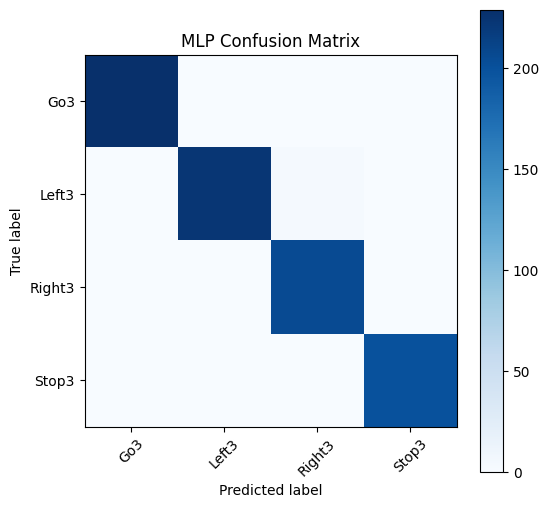

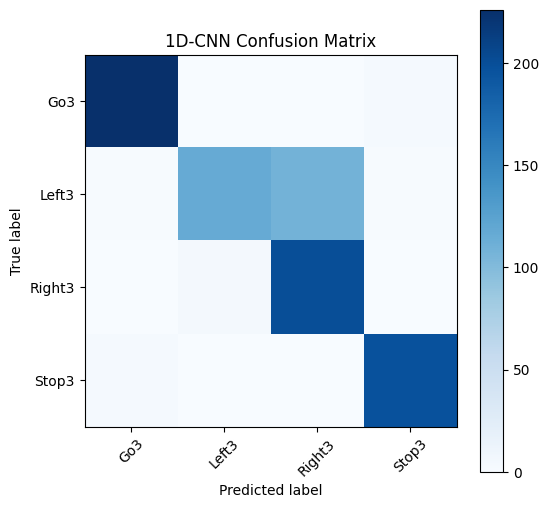

In [ ]:
# === Cell K ===
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model_tf(model, X_test_n, y_test):
    # get predictions
    preds = model.predict(X_test_n, batch_size=64)
    y_pred = np.argmax(preds, axis=1)
    print("Accuracy:", np.mean(y_pred == y_test))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=classes, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    return cm, y_pred

# Evaluate MLP
print("=== MLP Eval ===")
cm_mlp, ypred_mlp = evaluate_model_tf(mlp, X_test_n, y_test)

# Evaluate CNN1D
print("=== 1D-CNN Eval ===")
cm_cnn, ypred_cnn = evaluate_model_tf(cnn1d, X_test_n, y_test)

# Plot confusion matrix example (MLP)
def plot_cm(cm, labels, title="Confusion Matrix"):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_cm(cm_mlp, classes, title="MLP Confusion Matrix")
plot_cm(cm_cnn, classes, title="1D-CNN Confusion Matrix")


=== MLP Eval ===
Accuracy: 0.9508196721311475

Classification report:
              precision    recall  f1-score   support

          Go     0.9760    0.8841    0.9278       138
        Left     0.9733    1.0000    0.9865        73
       Right     1.0000    0.9500    0.9744       100
        Stop     0.8788    1.0000    0.9355       116

    accuracy                         0.9508       427
   macro avg     0.9570    0.9585    0.9560       427
weighted avg     0.9548    0.9508    0.9508       427


=== 1D-CNN Eval ===
Accuracy: 0.5362997658079626

Classification report:
              precision    recall  f1-score   support

          Go     0.0000    0.0000    0.0000       138
        Left     0.8824    0.2055    0.3333        73
       Right     0.6282    0.9800    0.7656       100
        Stop     0.4567    1.0000    0.6270       116

    accuracy                         0.5363       427
   macro avg     0.4918    0.5464    0.4315       427
weighted avg     0.4220    0.5363    0.40

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


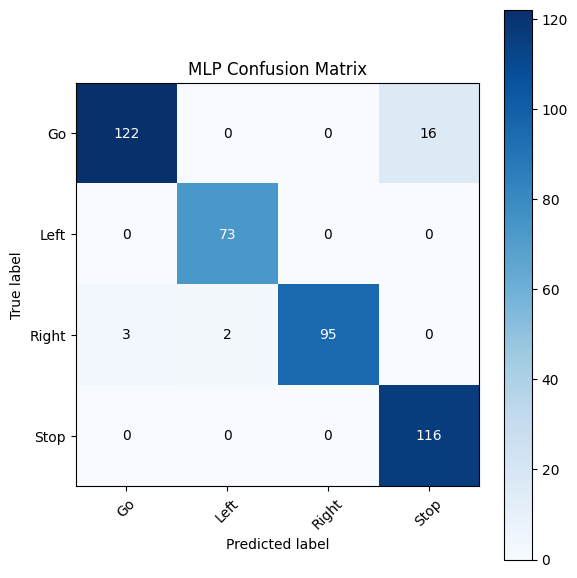

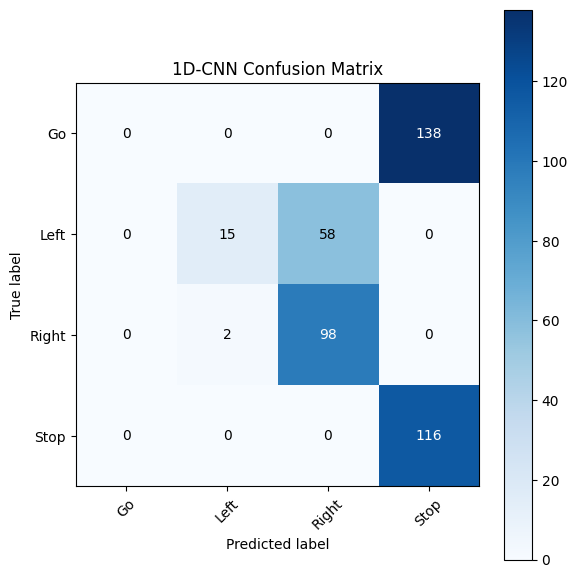


=== MLP METRICS ===
Precision: 0.9548
Recall   : 0.9508
mAP      : 0.9923


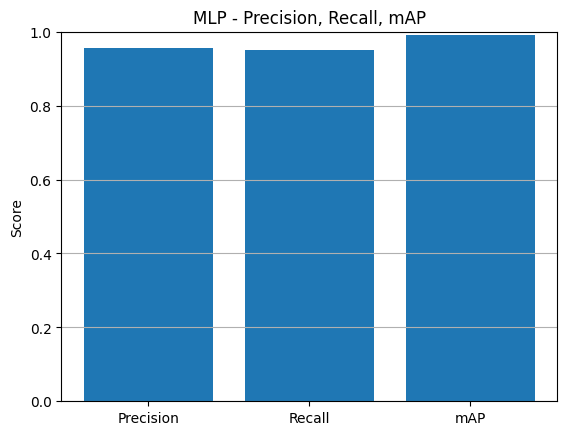


=== CNN1D METRICS ===
Precision: 0.4220
Recall   : 0.5363
mAP      : 0.9681


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


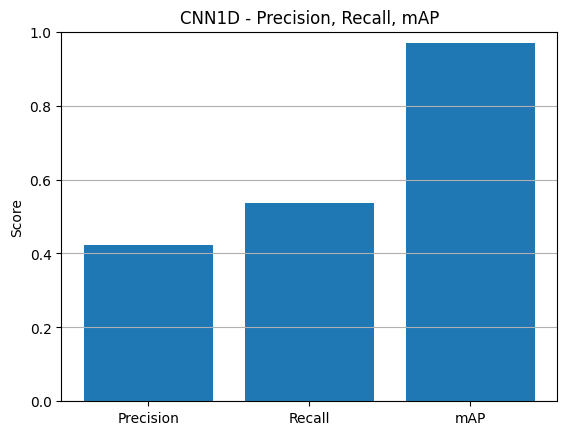

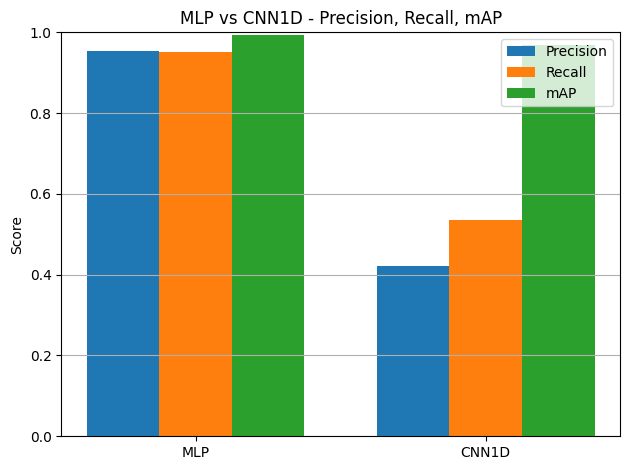

In [24]:
# === FULL EVAL (SAME ACCURACY AS YOUR Cell K, PLUS mAP / PRECISION / RECALL + GRAPHS) ===
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    average_precision_score
)
from sklearn.preprocessing import label_binarize

# -------------------------------------------------
# 1. Your original evaluation function, slightly extended
# -------------------------------------------------
def evaluate_model_tf(model, X_test_n, y_test):
    # get predictions (probabilities)
    preds = model.predict(X_test_n, batch_size=64, verbose=0)
    y_pred = np.argmax(preds, axis=1)

    # accuracy (exactly like your Cell K)
    acc = np.mean(y_pred == y_test)
    print("Accuracy:", acc)

    # classification report (same as before)
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=classes, digits=4))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    return cm, y_pred, preds

# -------------------------------------------------
# 2. Evaluate MLP and CNN1D using the SAME models and SAME X_test_n
#    (NO reloading, NO re-normalizing)
# -------------------------------------------------
print("=== MLP Eval ===")
cm_mlp, ypred_mlp, yprob_mlp = evaluate_model_tf(mlp, X_test_n, y_test)

print("\n=== 1D-CNN Eval ===")
cm_cnn, ypred_cnn, yprob_cnn = evaluate_model_tf(cnn1d, X_test_n, y_test)

# -------------------------------------------------
# 3. Confusion matrix plotting WITH numbers inside
# -------------------------------------------------
def plot_cm(cm, labels, title="Confusion Matrix"):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Show numbers in each cell
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )

    plt.tight_layout()
    plt.show()

# Plot confusion matrices (now with numbers)
plot_cm(cm_mlp, classes, title="MLP Confusion Matrix")
plot_cm(cm_cnn, classes, title="1D-CNN Confusion Matrix")

# -------------------------------------------------
# 4. Compute Precision, Recall, mAP + per-model bar graph
# -------------------------------------------------
def compute_and_plot_metrics(y_test, y_pred, y_prob, classes, model_name="Model"):
    # Weighted precision & recall for multi-class
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    # mAP using probabilities (one-vs-rest)
    num_classes = len(classes)
    y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))
    mAP = average_precision_score(y_test_bin, y_prob, average="macro")

    print(f"\n=== {model_name} METRICS ===")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"mAP      : {mAP:.4f}")

    # Bar graph for this model
    metric_names = ["Precision", "Recall", "mAP"]
    metric_vals = [precision, recall, mAP]

    plt.figure()
    plt.bar(metric_names, metric_vals)
    plt.ylim(0, 1.0)
    plt.ylabel("Score")
    plt.title(f"{model_name} - Precision, Recall, mAP")
    plt.grid(axis="y")
    plt.show()

    return precision, recall, mAP

# Metrics + graphs for MLP
prec_mlp, rec_mlp, map_mlp = compute_and_plot_metrics(
    y_test, ypred_mlp, yprob_mlp, classes, model_name="MLP"
)

# Metrics + graphs for CNN1D
prec_cnn, rec_cnn, map_cnn = compute_and_plot_metrics(
    y_test, ypred_cnn, yprob_cnn, classes, model_name="CNN1D"
)

# -------------------------------------------------
# 5. OPTIONAL: Combined comparison graph (MLP vs CNN1D)
# -------------------------------------------------
models = ["MLP", "CNN1D"]
x = np.arange(len(models))
width = 0.25

plt.figure()
plt.bar(x - width, [prec_mlp, prec_cnn], width, label="Precision")
plt.bar(x,         [rec_mlp,  rec_cnn],  width, label="Recall")
plt.bar(x + width, [map_mlp,  map_cnn],  width, label="mAP")

plt.xticks(x, models)
plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.title("MLP vs CNN1D - Precision, Recall, mAP")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [20]:
def plot_cm(cm, labels, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # ✅ SHOW NUMBERS IN EACH CELL
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )

    plt.tight_layout()
    plt.show()


In [ ]:
# === Cell K (Keras 3 compatible export + TFLite conversion) ===
import tensorflow as tf
import os, shutil
from pathlib import Path

# Paths - adjust only if your files are in different places
BASE = "/content/drive/MyDrive/robot_dataset3"
mlp_h5 = os.path.join(BASE, "mlp_best3.h5")
cnn_h5 = os.path.join(BASE, "cnn1d_best3.h5")

SAVE_DIR = os.path.join(BASE, "models")
TFLITE_DIR = os.path.join(BASE, "tflite")

Path(SAVE_DIR).mkdir(parents=True, exist_ok=True)
Path(TFLITE_DIR).mkdir(parents=True, exist_ok=True)

# ---- Load H5 models ----
print("Loading MLP:", mlp_h5)
mlp_model = tf.keras.models.load_model(mlp_h5)
print("Loading CNN:", cnn_h5)
cnn_model = tf.keras.models.load_model(cnn_h5)

# ---- Export helpers (Keras 3) ----
def export_savedmodel(model, out_dir):
    """
    Export a Keras model to TensorFlow SavedModel directory.
    Prefer model.export(out_dir) (Keras 3), fallback to tf.saved_model.save.
    """
    if os.path.exists(out_dir):
        print("Removing existing folder:", out_dir)
        shutil.rmtree(out_dir)
    print("Exporting model to SavedModel dir:", out_dir)
    # Prefer model.export if available (Keras 3)
    if hasattr(model, "export"):
        try:
            model.export(out_dir)
            print("Exported with model.export()")
            return
        except Exception as e:
            print("model.export() failed:", e)
            # fallthrough to tf.saved_model.save
    # Fallback
    try:
        tf.saved_model.save(model, out_dir)
        print("Exported with tf.saved_model.save()")
    except Exception as e:
        raise RuntimeError(f"Failed to export model to SavedModel: {e}")

def convert_to_tflite(saved_model_dir, out_path):
    print(f"Converting SavedModel '{saved_model_dir}' -> {out_path}")
    converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
    # Light optimizations (optional)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    with open(out_path, "wb") as f:
        f.write(tflite_model)
    print("Wrote TFLite:", out_path)

# ---- Paths for SavedModel export ----
mlp_saved = os.path.join(SAVE_DIR, "mlp3_saved")
cnn_saved = os.path.join(SAVE_DIR, "cnn3_saved")

# ---- Export ----
export_savedmodel(mlp_model, mlp_saved)
export_savedmodel(cnn_model, cnn_saved)

# ---- Convert to TFLite ----
mlp_tflite = os.path.join(TFLITE_DIR, "mlp_best3.tflite")
cnn_tflite = os.path.join(TFLITE_DIR, "cnn1d_best3.tflite")

convert_to_tflite(mlp_saved, mlp_tflite)
convert_to_tflite(cnn_saved, cnn_tflite)

print("\n✅ Export + conversion complete.")
print("SavedModel dirs:", mlp_saved, cnn_saved)
print("TFLite files:", mlp_tflite, cnn_tflite)


Loading MLP: /content/drive/MyDrive/robot_dataset3/mlp_best3.h5


Loading CNN: /content/drive/MyDrive/robot_dataset3/cnn1d_best3.h5
Exporting model to SavedModel dir: /content/drive/MyDrive/robot_dataset3/models/mlp3_saved
Saved artifact at '/content/drive/MyDrive/robot_dataset3/models/mlp3_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')]
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  131968311793168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131968311788944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131968311803152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131968311802384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131968311803536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131968311801232: TensorSpec(shape=(), dtype=tf.resource, name=None)
Exported with model.export()
Exporting model to SavedModel dir: /content/drive/MyDrive/robot_dataset3/

In [67]:
import numpy as np
import os

OUT = "/content/drive/MyDrive/mediapipe_landmarks"

train = np.load(os.path.join(OUT, "train_mp_hands_42d.npz"))
val   = np.load(os.path.join(OUT, "val_mp_hands_42d.npz"))
test  = np.load(os.path.join(OUT, "test_mp_hands_42d.npz"))

X_train = train["X"]
y_train = train["y"]

X_val = val["X"]
y_val = val["y"]

X_test = test["X"]
y_test = test["y"]

classes = train["classes"].tolist()

print("✅ Data loaded from Drive")
print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)
print("Classes:", classes)


✅ Data loaded from Drive
Train: (1956, 42) (1956,)
Val  : (423, 42) (423,)
Test : (427, 42) (427,)
Classes: ['Go', 'Left', 'Right', 'Stop']


In [68]:
mean = X_train.mean(0, keepdims=True)
std  = X_train.std(0, keepdims=True) + 1e-9

X_train_n = (X_train - mean) / std
X_val_n   = (X_val   - mean) / std
X_test_n  = (X_test  - mean) / std

print("✅ Normalization complete")
print("X_train_n shape:", X_train_n.shape)


✅ Normalization complete
X_train_n shape: (1956, 42)


In [69]:
print("X_train_n exists:", "X_train_n" in globals())
print("y_train exists  :", "y_train" in globals())
print("classes exists  :", "classes" in globals())


X_train_n exists: True
y_train exists  : True
classes exists  : True


In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models

N_LANDMARKS = 21
USE_Z = False
input_dim = X_train_n.shape[1]
num_classes = len(classes)

def build_1d_cnn(input_dim, num_classes, use_z=False):
    features = 3 if use_z else 2
    seq_len = N_LANDMARKS

    inp = layers.Input(shape=(input_dim,))
    x = layers.Reshape((seq_len, features))(inp)
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inp, out, name='cnn1d_landmarks')
    return model

cnn1d = build_1d_cnn(input_dim, num_classes, use_z=USE_Z)
cnn1d.summary()


Model: "cnn1d_landmarks"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 21, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 21, 64)         │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,668 (131.52 KB)

 Trainable params: 33,668 (131.52 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import tensorflow as tf

initial_lr = 1e-3
min_lr = 1e-4

opt = tf.keras.optimizers.Adam(learning_rate=initial_lr)

cnn1d.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ CNN1D compiled successfully")


✅ CNN1D compiled successfully


In [72]:
callbacks_cnn = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=8, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=3, min_lr=min_lr, verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/robot_dataset3/cnn1d_best3.h5",
        save_best_only=True,
        monitor='val_loss'
    )
]

print("✅ CNN callbacks ready")


✅ CNN callbacks ready


In [74]:
import tensorflow as tf

def make_dataset(X, y, training=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if training:
        ds = ds.shuffle(1000)
    ds = ds.batch(32).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_dataset(X_train_n, y_train, training=True)
val_ds   = make_dataset(X_val_n, y_val, training=False)
test_ds  = make_dataset(X_test_n, y_test, training=False)

print("✅ train_ds, val_ds, test_ds restored")


✅ train_ds, val_ds, test_ds restored


In [76]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

cw = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i: float(cw[i]) for i in range(len(cw))}

print("✅ class_weights restored:", class_weights)


✅ class_weights restored: {0: 0.7652582159624414, 1: 1.5425867507886435, 2: 1.0538793103448276, 3: 0.9123134328358209}


In [77]:
epochs = 60

hist_c = cnn1d.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=callbacks_cnn
)


Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7745 - loss: 0.8664

62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.7744 - loss: 0.8637 - val_accuracy: 0.6785 - val_loss: 0.5428 - learning_rate: 0.0010
Epoch 2/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - loss: 0.3992

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7091 - loss: 0.4016 - val_accuracy: 0.6785 - val_loss: 0.5091 - learning_rate: 0.0010
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6850 - loss: 0.3948

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6857 - loss: 0.3948 - val_accuracy: 0.6785 - val_loss: 0.4705 - learning_rate: 0.0010
Epoch 4/60
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6675 - loss: 0.3718

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6706 - loss: 0.3713 - val_accuracy: 0.6785 - val_loss: 0.4095 - learning_rate: 0.0010
Epoch 5/60
55/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7286 - loss: 0.3120

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7372 - loss: 0.3105 - val_accuracy: 0.7423 - val_loss: 0.3322 - learning_rate: 0.0010
Epoch 6/60
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8604 - loss: 0.2290

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8615 - loss: 0.2289 - val_accuracy: 0.9953 - val_loss: 0.1461 - learning_rate: 0.0010
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0857

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0857 - val_accuracy: 1.0000 - val_loss: 0.0630 - learning_rate: 0.0010
Epoch 8/60
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0315

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9955 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 0.0129 - learning_rate: 0.0010
Epoch 9/60
56/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0092

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9983 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 10/60
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0052

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 11/60
45/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 12/60
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 13/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011    

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 14/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9642e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 15/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.0985e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.9583e-04 - val_accuracy: 1.0000 - val_loss: 9.9307e-04 - learning_rate: 0.0010
Epoch 16/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.0154e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.0189e-04 - val_accuracy: 1.0000 - val_loss: 7.6673e-04 - learning_rate: 0.0010
Epoch 17/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5986e-04 - val_accuracy: 1.0000 - val_loss: 9.2387e-04 - learning_rate: 0.0010
Epoch 18/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.0417e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.6003e-04 - val_accuracy: 1.0000 - val_loss: 5.9334e-04 - learning_rate: 0.0010
Epoch 19/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1205e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.0228e-04 - val_accuracy: 1.0000 - val_loss: 5.0331e-04 - learning_rate: 0.0010
Epoch 20/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.3500e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.3398e-04 - val_accuracy: 1.0000 - val_loss: 4.2960e-04 - learning_rate: 0.0010
Epoch 21/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8300e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.8930e-04 - val_accuracy: 1.0000 - val_loss: 3.9430e-04 - learning_rate: 0.0010
Epoch 22/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3772e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.1694e-04 - val_accuracy: 1.0000 - val_loss: 2.9197e-04 - learning_rate: 0.0010
Epoch 23/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8531e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.9047e-04 - val_accuracy: 1.0000 - val_loss: 2.8144e-04 - learning_rate: 0.0010
Epoch 24/60
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.8724e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.8768e-04 - val_accuracy: 1.0000 - val_loss: 2.6310e-04 - learning_rate: 0.0010
Epoch 25/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8937e-04
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.8365e-04 - val_accuracy: 1.0000 - val_loss: 2.3257e-04 - learning_rate: 0.0010
Epoch 26/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5055e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.5070e-04 - val_accuracy: 1.0000 - val_loss: 2.2586e-04 - learning_rate: 2.0000e-04
Epoch 27/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4418e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.4514e-04 - val_accuracy: 1.0000 - val_loss: 2.2281e-04 - learning_rate: 2.0000e-04
Epoch 28/60
59/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3798e-04
Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0001.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.3826e-04 - val_accuracy: 1.0000 - val_loss: 2.2062e-04 - learning_rate: 2.0000e-04
Epoch 29/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1982e-04 - val_accuracy: 1.0000 - val_loss: 2.2072e-04 - learning_rate: 1.0000e-04
Epoch 30/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3761e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.3846e-04 - val_accuracy: 1.0000 - val_loss: 2.1918e-04 - learning_rate: 1.0000e-04
Epoch 31/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0907e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1682e-04 - val_accuracy: 1.0000 - val_loss: 2.1841e-04 - learning_rate: 1.0000e-04
Epoch 32/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3024e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.3128e-04 - val_accuracy: 1.0000 - val_loss: 2.1668e-04 - learning_rate: 1.0000e-04
Epoch 33/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2273e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.2429e-04 - val_accuracy: 1.0000 - val_loss: 2.1651e-04 - learning_rate: 1.0000e-04
Epoch 34/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0722e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1522e-04 - val_accuracy: 1.0000 - val_loss: 2.1476e-04 - learning_rate: 1.0000e-04
Epoch 35/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1262e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1852e-04 - val_accuracy: 1.0000 - val_loss: 2.1266e-04 - learning_rate: 1.0000e-04
Epoch 36/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.0951e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1340e-04 - val_accuracy: 1.0000 - val_loss: 2.1090e-04 - learning_rate: 1.0000e-04
Epoch 37/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3305e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.3102e-04 - val_accuracy: 1.0000 - val_loss: 2.0943e-04 - learning_rate: 1.0000e-04
Epoch 38/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0675e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1246e-04 - val_accuracy: 1.0000 - val_loss: 2.0764e-04 - learning_rate: 1.0000e-04
Epoch 39/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0460e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1091e-04 - val_accuracy: 1.0000 - val_loss: 2.0527e-04 - learning_rate: 1.0000e-04
Epoch 40/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1338e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1473e-04 - val_accuracy: 1.0000 - val_loss: 2.0330e-04 - learning_rate: 1.0000e-04
Epoch 41/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0568e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0818e-04 - val_accuracy: 1.0000 - val_loss: 2.0091e-04 - learning_rate: 1.0000e-04
Epoch 42/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.2140e-04 - val_accuracy: 1.0000 - val_loss: 2.0124e-04 - learning_rate: 1.0000e-04
Epoch 43/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.3260e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0131e-04 - val_accuracy: 1.0000 - val_loss: 1.9888e-04 - learning_rate: 1.0000e-04
Epoch 44/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0623e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0957e-04 - val_accuracy: 1.0000 - val_loss: 1.9730e-04 - learning_rate: 1.0000e-04
Epoch 45/60
44/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.8976e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0158e-04 - val_accuracy: 1.0000 - val_loss: 1.9635e-04 - learning_rate: 1.0000e-04
Epoch 46/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1143e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1364e-04 - val_accuracy: 1.0000 - val_loss: 1.9236e-04 - learning_rate: 1.0000e-04
Epoch 47/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5219e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.9752e-05 - val_accuracy: 1.0000 - val_loss: 1.9087e-04 - learning_rate: 1.0000e-04
Epoch 48/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.0524e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.4518e-05 - val_accuracy: 1.0000 - val_loss: 1.8715e-04 - learning_rate: 1.0000e-04
Epoch 49/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1637e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.9289e-05 - val_accuracy: 1.0000 - val_loss: 1.8659e-04 - learning_rate: 1.0000e-04
Epoch 50/60
55/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.2734e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.3482e-05 - val_accuracy: 1.0000 - val_loss: 1.8131e-04 - learning_rate: 1.0000e-04
Epoch 51/60
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.9600e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 9.0465e-05 - val_accuracy: 1.0000 - val_loss: 1.8010e-04 - learning_rate: 1.0000e-04
Epoch 52/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7854e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.8032e-05 - val_accuracy: 1.0000 - val_loss: 1.7711e-04 - learning_rate: 1.0000e-04
Epoch 53/60
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.3832e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.4923e-05 - val_accuracy: 1.0000 - val_loss: 1.7681e-04 - learning_rate: 1.0000e-04
Epoch 54/60
55/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0084e-04

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.0035e-04 - val_accuracy: 1.0000 - val_loss: 1.7263e-04 - learning_rate: 1.0000e-04
Epoch 55/60
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.1247e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 9.1444e-05 - val_accuracy: 1.0000 - val_loss: 1.7095e-04 - learning_rate: 1.0000e-04
Epoch 56/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.4082e-05 - val_accuracy: 1.0000 - val_loss: 1.7116e-04 - learning_rate: 1.0000e-04
Epoch 57/60
57/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.1685e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.3171e-05 - val_accuracy: 1.0000 - val_loss: 1.6728e-04 - learning_rate: 1.0000e-04
Epoch 58/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.3482e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.7267e-05 - val_accuracy: 1.0000 - val_loss: 1.6567e-04 - learning_rate: 1.0000e-04
Epoch 59/60
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.5413e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.5501e-05 - val_accuracy: 1.0000 - val_loss: 1.6361e-04 - learning_rate: 1.0000e-04
Epoch 60/60
43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.0187e-05

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.3982e-05 - val_accuracy: 1.0000 - val_loss: 1.6088e-04 - learning_rate: 1.0000e-04


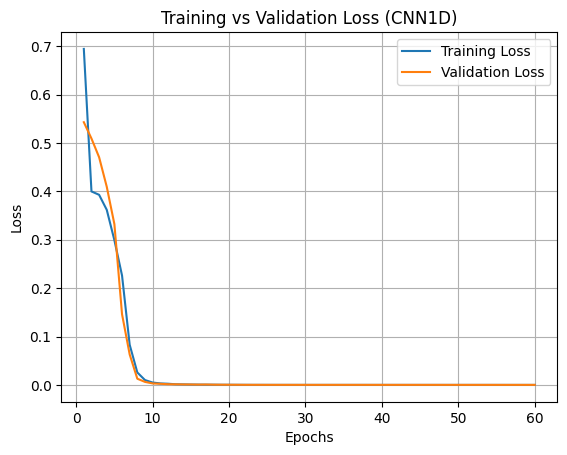

In [79]:
import matplotlib.pyplot as plt

train_loss = hist_c.history["loss"]
val_loss   = hist_c.history["val_loss"]

epochs_range = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (CNN1D)")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, precision_score, recall_score
import numpy as np
import tensorflow as tf

class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, num_classes):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.num_classes = num_classes
        self.mAPs = []
        self.precisions = []
        self.recalls = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred_probs = self.model.predict(self.X_val, verbose=0)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Precision & Recall
        precision = precision_score(self.y_val, y_pred, average="weighted")
        recall = recall_score(self.y_val, y_pred, average="weighted")

        # mAP
        y_val_bin = label_binarize(self.y_val, classes=np.arange(self.num_classes))
        mAP = average_precision_score(y_val_bin, y_pred_probs, average="macro")

        self.precisions.append(precision)
        self.recalls.append(recall)
        self.mAPs.append(mAP)

        print(f"Epoch {epoch+1}: Precision={precision:.4f}, Recall={recall:.4f}, mAP={mAP:.4f}")


In [7]:
import numpy as np
import os

# Load datasets from Google Drive
OUT = "/content/drive/MyDrive/mediapipe_landmarks"

train = np.load(os.path.join(OUT, "train_mp_hands_42d.npz"))
val   = np.load(os.path.join(OUT, "val_mp_hands_42d.npz"))
test  = np.load(os.path.join(OUT, "test_mp_hands_42d.npz"))

X_train = train["X"]
y_train = train["y"]

X_val = val["X"]
y_val = val["y"]

X_test = test["X"]
y_test = test["y"]

classes = train["classes"].tolist()

print("✅ Data Reloaded")
print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)

# Rebuild normalization
mean = X_train.mean(0, keepdims=True)
std  = X_train.std(0, keepdims=True) + 1e-9

X_train_n = (X_train - mean) / std
X_val_n   = (X_val   - mean) / std
X_test_n  = (X_test  - mean) / std

print("✅ Normalization rebuilt")
print("X_train_n:", X_train_n.shape)
print("X_val_n  :", X_val_n.shape)
print("X_test_n :", X_test_n.shape)


✅ Data Reloaded
Train: (1956, 42) (1956,)
Val  : (423, 42) (423,)
Test : (427, 42) (427,)
✅ Normalization rebuilt
X_train_n: (1956, 42)
X_val_n  : (423, 42)
X_test_n : (427, 42)


In [8]:
metrics_callback = MetricsCallback(X_val_n, y_val, len(classes))
